In [4]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


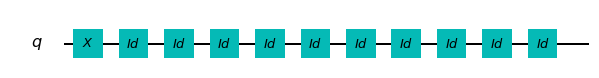

In [5]:
circ0 = QuantumCircuit(1)
circ0.x(0)
for i in range(10):
    circ0.iden(0)
circ0.draw()

In [ ]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

Job Status: job has successfully run


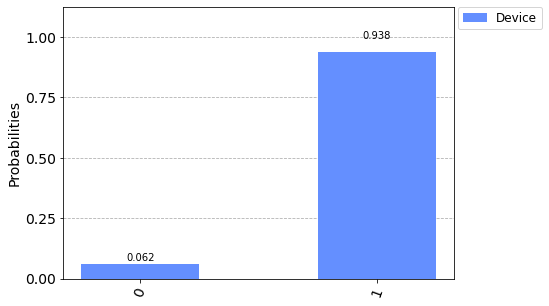

In [7]:
meas = QuantumCircuit(1,1)
meas.barrier(range(1))
meas.measure(range(1),range(1))
qc = circ0+meas
provider = IBMQ.get_provider(group='open')
backend = provider.get_backend('ibmq_16_melbourne')

from qiskit.tools.monitor import job_monitor

job_exp = execute(qc, backend=backend)
job_monitor(job_exp)
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp], legend=['Device'])

Po pomiarze okazuje się, że w niektórych interacjach wynikiem było 0 (a z powyższego układu spodziewalibyśmy się tylko 1. Wynika to z dekoherencji, ponieważ obliczenia zostały przeprowadzone na rzeczywistym komputerze.
Poniżej, został przedstawiony drugi podpunkt zadania.

In [9]:
circ = QuantumCircuit(3)

Chcemy uzyskać:
|ψ⟩=(|010⟩+|111⟩)/√2
W tym celu, wykonujemy następujące operacje:

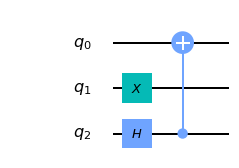

In [10]:
circ.x(1)
circ.h(2)
circ.cx(2,0)
circ.draw()

statevector_simulator:

In [11]:
from qiskit import Aer
backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
for i in outputstate:
    print(i)

0j
0j
(0.707+0j)
0j
0j
0j
0j
(0.707+0j)


Zgodnie z oczekiwaniami otrzymaliśmy wektor 8 wymiarowy (bo 3 kubity, więc 2^3), gdzie na pozycjach 2 i 7 (odpowiadających binarnemu zapisu 010 i 111) otrzymaliśmy 1/√2~0.707

Macierz gęstości:

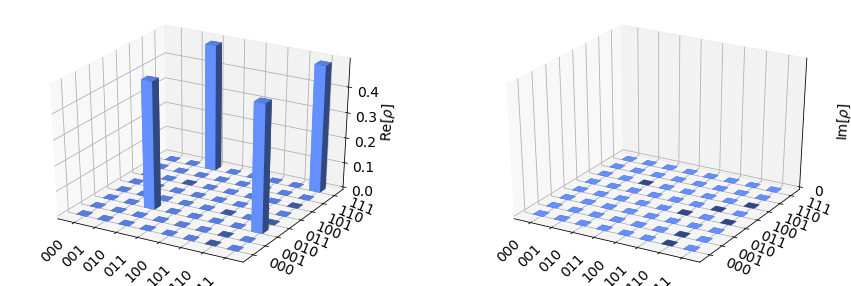

In [12]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

Zgodnie ze wzorem na macierz gęstości powinniśmy pomnożyć wektor otrzymany przez funkcje get_statevector() przez jego transpozycje+sprzężenie(bra).
Zgodnie z wynikiem otrzymanym przez funkcje get_statevector() część urojona jest równa 0, stąd też na drugim wykresie brak słupków.
Jeśli chodzi o pierwszy wykres: powstała macierz 8x8, składająca się z samych zer oraz wartości 0.5, na tych pozycjach, na których przecinają się wartości 1/√2 obu wektorów (czyli w macierzy będą to pozycje o indeksie (2,7), (2,2), (7,2), (7,7)). Sytuacje tą odwzorowuje pierwszy wykres słupkowy.


symulator:

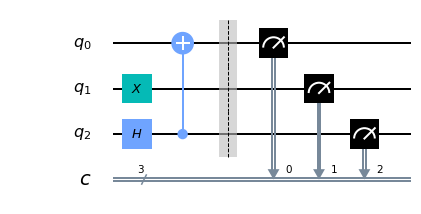

In [13]:
meas1 = QuantumCircuit(3, 3)
meas1.barrier(range(3))
meas1.measure(range(3),range(3))
qc1 = circ+meas1
qc1.draw()

In [14]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc1, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc1)

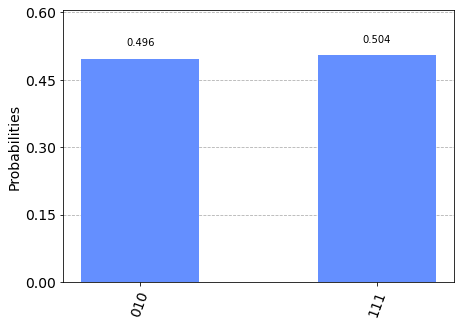

In [15]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

Powyżej prezentowane są wyniki z wykonaniem pomiaru. Zgodnie z oczekiwaniami, otrzymaliśmy jeden z dwóch możliwych stanów - 010 i 111. Minimalnie częściej otrzymaliśmy 111.

komputer kwantowy:

In [16]:
from qiskit import IBMQ
provider = IBMQ.get_provider(group='open')
backend = provider.get_backend('ibmq_16_melbourne')

Job Status: job has successfully run


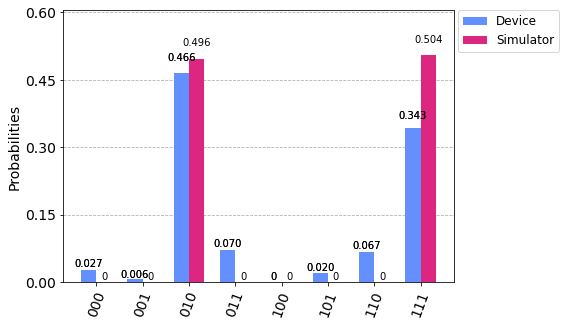

In [17]:
job_exp = execute(qc1, backend=backend)
job_monitor(job_exp)
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(qc1)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

Nie mamy tu już do czynienia z idealnym symulatorem, więc można tu zauważyć wpływ dekoherencji. Mimo, iż w większości otrzymujemy 010 oraz 111, z pewnym niewielkim prawdopodobieństwem pojawiły się też inne stany.  